In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/hp/stroke/stroke.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
#checking the data is balanced or not
df['stroke'].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

In [5]:
df.drop(['id'],axis = 1,inplace = True)

In [8]:
df['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [9]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [6]:
#Let's remove this row
df0 = df[~(df['gender'] == 'Other')]


In [11]:
df0.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
from feature_engine.imputation import RandomSampleImputer
rsi = RandomSampleImputer()
dfe = rsi.fit_transform(df0)

In [13]:
dfe.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [8]:
x = dfe.drop(['stroke'],axis = 1)
y = dfe[['stroke']]

In [9]:
from imblearn.over_sampling import SMOTENC

smote_nc = SMOTENC(categorical_features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type','smoking_status'], random_state=0)
xresampled,yresampled = smote_nc.fit_resample(x,y)
xr = pd.DataFrame(xresampled,columns =  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 'avg_glucose_level', 'bmi','smoking_status'])
yr = pd.DataFrame(yresampled)
resdf = pd.concat([xr,yr],axis = 1)
resdf


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.210000,36.000000,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9715,Male,78.0,0,1,Yes,Self-employed,Urban,194.791185,29.415221,Unknown,1
9716,Female,79.0,0,0,Yes,Private,Urban,92.787494,17.232964,formerly smoked,1
9717,Female,79.0,1,0,Yes,Self-employed,Rural,199.648584,30.657735,never smoked,1
9718,Female,71.0,0,0,Yes,Govt_job,Rural,206.251216,41.742289,never smoked,1


In [10]:
'''
since we are predicting heart stroke
we will be interested in exploring rows who experienced stroke
'''
strok = resdf[resdf['stroke'] == 1]

<Axes: xlabel='gender', ylabel='count'>

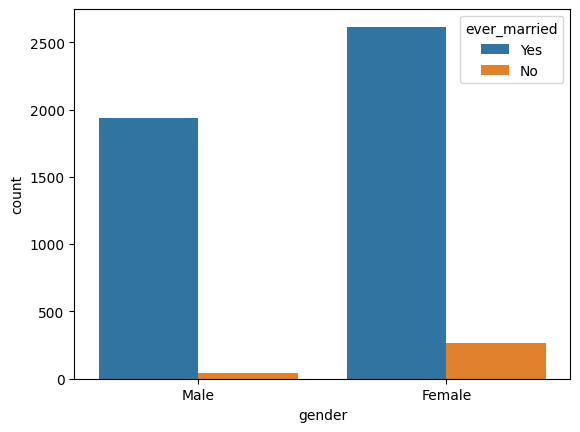

In [11]:
sns.countplot(x = strok['gender'],hue = strok['ever_married'])

In [12]:
# let's look into age column now

resdf[resdf['age']<1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
564,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
982,Male,0.88,0,0,No,children,Rural,157.57,19.2,Unknown,0
996,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,Female,0.32,0,0,No,children,Rural,55.86,16.0,Unknown,0
1206,Female,0.72,0,0,No,children,Urban,66.36,23.0,Unknown,0
1317,Male,0.80,0,0,No,children,Rural,98.67,17.5,Unknown,0
1600,Male,0.40,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0


In [13]:
# let's round this value to 1, for making model simple

resdf.loc[resdf['age']<1,'age'] = 1

In [14]:
resdf[resdf['age']<1]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [15]:
strok['age'].describe()

count    4860.000000
mean       69.558864
std        12.150131
min         1.320000
25%        60.000000
50%        75.000000
75%        79.000000
max        82.000000
Name: age, dtype: float64

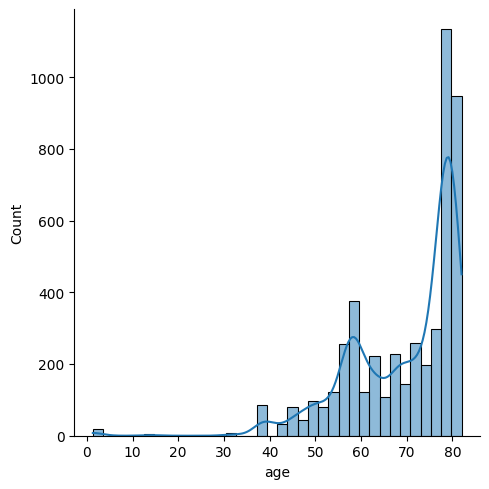

In [16]:
sns.displot(x = strok['age'],kde =True)

In [23]:
# right skewed

<Axes: xlabel='gender', ylabel='count'>

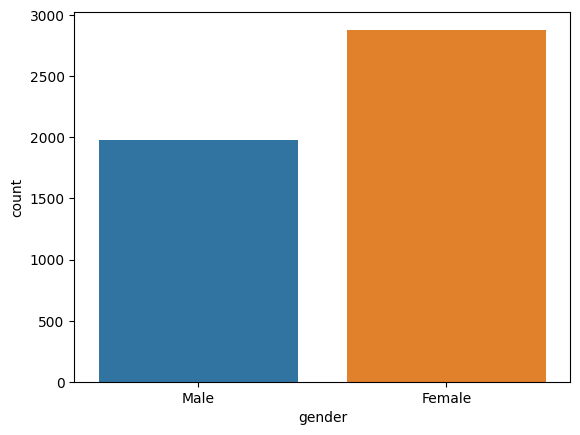

In [17]:
sns.countplot(x = strok['gender'])

In [25]:
# will encode yes as 1 and no as 0

<Axes: xlabel='ever_married', ylabel='count'>

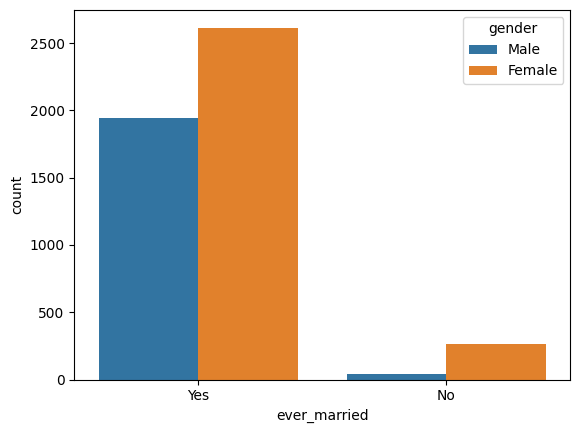

In [18]:
sns.countplot(x= strok['ever_married'],hue = strok['gender'])

In [27]:
# will encode yes as 1 and no as 0

<Axes: xlabel='work_type', ylabel='count'>

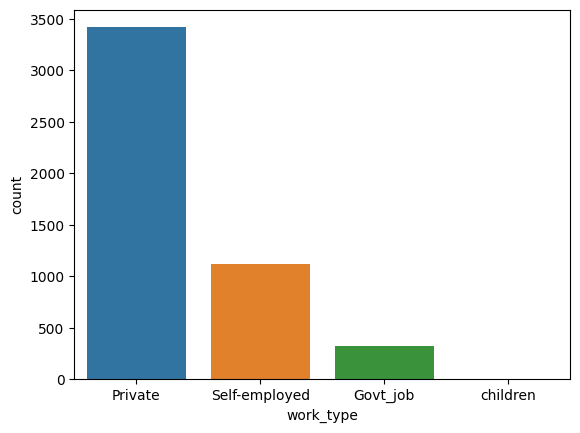

In [28]:
sns.countplot(x = strok['work_type'])

In [29]:
# may be due to mental health

In [30]:
resdf['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [31]:
resdf[(resdf['work_type'] == 'children') | (resdf['work_type'] == 'Never_worked')]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,Female,1.32,0,0,No,children,Urban,70.37,25.5,Unknown,1
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1
249,Male,3.00,0,0,No,children,Rural,95.12,18.0,Unknown,0
253,Male,14.00,0,0,No,Never_worked,Rural,161.28,19.1,Unknown,0
282,Female,3.00,0,0,No,children,Urban,73.74,16.0,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
5088,Female,1.00,0,0,No,children,Rural,62.13,16.8,Unknown,0
5093,Male,13.00,0,0,No,children,Urban,82.38,24.3,Unknown,0
5094,Male,1.08,0,0,No,children,Rural,79.15,17.4,Unknown,0
5097,Male,9.00,0,0,No,children,Urban,71.88,17.5,Unknown,0


<Axes: xlabel='work_type', ylabel='count'>

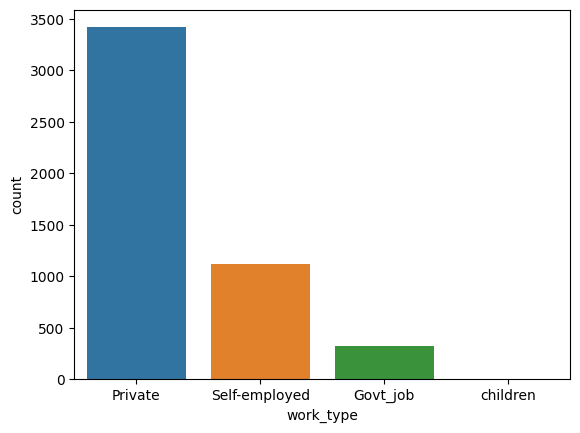

In [32]:
sns.countplot(x = strok['work_type'])

In [33]:
# will encode  , govt = 0 , self = 1 , private = 2

<Axes: xlabel='Residence_type', ylabel='count'>

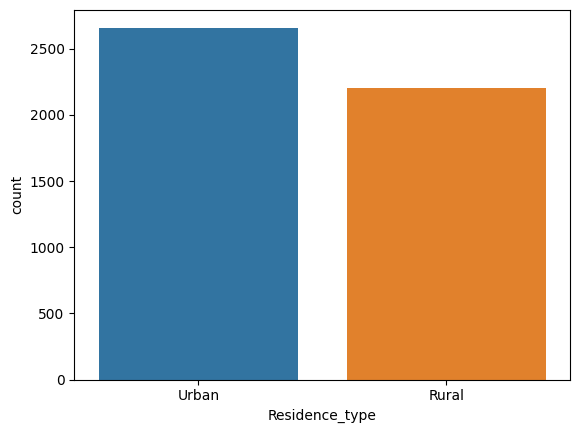

In [34]:
sns.countplot(x = strok['Residence_type'])

In [35]:
# no much difference , go for onehot encoding

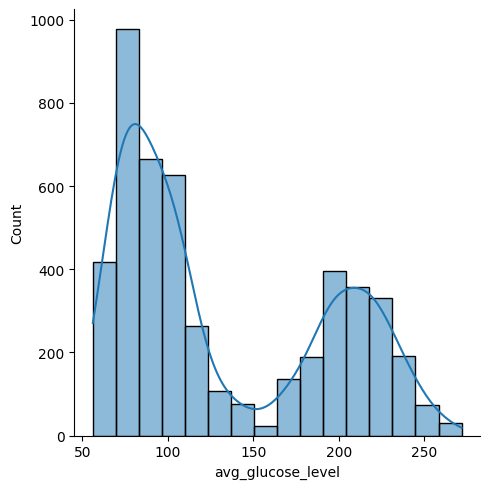

In [36]:
sns.displot(x = strok['avg_glucose_level'], kde = True)

In [37]:
# bimodal distribution

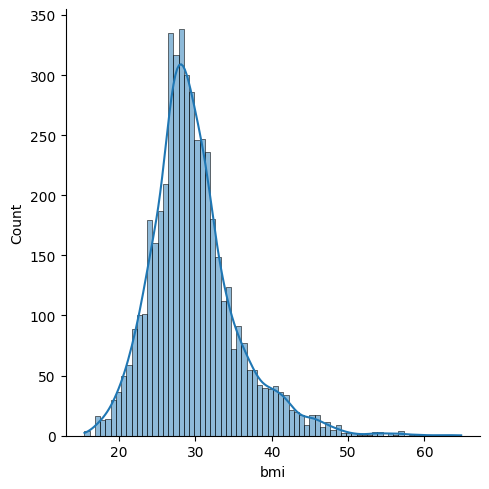

In [38]:
sns.displot(x = strok['bmi'], kde = True)

In [39]:
#slightly left skewed distribution

<Axes: xlabel='smoking_status', ylabel='age'>

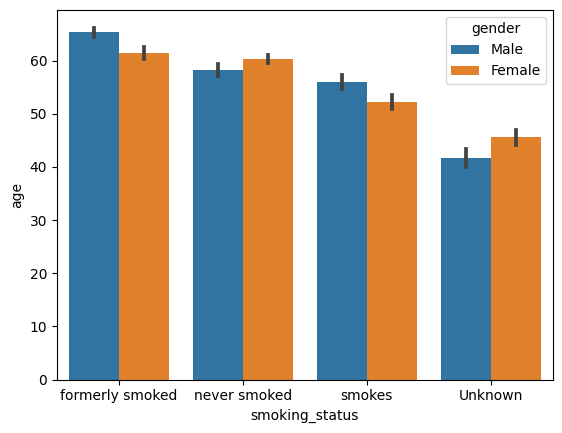

In [40]:
sns.barplot(x= resdf['smoking_status'], y = resdf['age'] , hue = resdf['gender'])

1. "Smoking unknown" individuals tend to be younger.
2. Females report "unknown" smoking status more frequently.
3. Considering smoking's stroke risk, "unknown" may conceal smoking.
4. Hence, it is reasonable to replace "unknown" with "smokes."

In [19]:
resdf['smoking_status'] = resdf['smoking_status'].replace('Unknown','smokes')

In [89]:
resdf

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.690000,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.210000,36.000000,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.230000,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.120000,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9715,Male,78.0,0,1,Yes,Self-employed,Urban,194.791185,29.415221,smokes,1
9716,Female,79.0,0,0,Yes,Private,Urban,92.787494,17.232964,formerly smoked,1
9717,Female,79.0,1,0,Yes,Self-employed,Rural,199.648584,30.657735,never smoked,1
9718,Female,71.0,0,0,Yes,Govt_job,Rural,206.251216,41.742289,never smoked,1


In [105]:
x = resdf.drop(['stroke'],axis = 1)
y = resdf['stroke']

In [106]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
from sklearn.compose import make_column_transformer
ord_cat = [['No','Yes'],['Never_worked','children','Govt_job','Self-employed','Private'],['never smoked','formerly smoked','smokes']]
tran = make_column_transformer((OneHotEncoder(drop = 'first'),['gender' , 'Residence_type']),
                               (OrdinalEncoder(categories = ord_cat),['ever_married' , 'work_type' , 'smoking_status']),
                               remainder = 'passthrough')


In [107]:
 x = tran.fit_transform(x)

In [108]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30 , random_state = 42)

In [109]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(splitter = 'random')

model.fit(xtrain,ytrain)

DecisionTreeClassifier(splitter='random')

In [110]:
ypred = model.predict(xtest)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,ypred)

0.894718792866941

In [59]:
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
}


grid_search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy')
grid_search.fit(xtrain, ytrain)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [60]:
best_model = grid_search.best_estimator_

In [61]:
best_params = grid_search.best_params_
best_params

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'random'}

In [62]:
ypred = best_model.predict(xtest)

In [63]:
accuracy_score(ytest, ypred)

0.897119341563786

In [55]:

from sklearn.svm import SVC
model2 = SVC()
model2.fit(xtrain,ytrain)
ypred = model2.predict(xtest)

In [56]:
accuracy_score(ytest,ypred)

0.77400548696845

In [57]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()
model3.fit(xtrain,ytrain)
ypred = model3.predict(xtest)

In [58]:
accuracy_score(ytest,ypred)

0.7139917695473251

In [112]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(tran,model)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'Residence_type']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['No',
                                                                              'Yes'],
                                                                             ['Never_worked',
                                                                              'children',
                                                                              'Govt_job',
                                                                              'Self-employed',
                                                                              'Private'],
                                                                             ['never '
                                                                              'smoked',
                                                                              'formerly '
                                                                              'smoked',
                                                                              'smokes']]),
                                                  ['ever_married', 'work_type',
                                                   'smoking_status'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(splitter='random'))])

In [118]:
x = resdf.drop(['stroke'],axis = 1)
y = resdf['stroke']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30,random_state = 42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)

In [120]:
accuracy_score(ytest,ypred)

0.894718792866941

In [125]:
import pickle
pickle.dump(pipe,open('model.pkl','wb'))


## Delete me after use

In [126]:
resdf.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [127]:
resdf['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [138]:
resdf['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes'], dtype=object)

In [137]:
resdf['bmi'].describe()

count    9720.000000
mean       29.374318
std         6.937878
min        10.300000
25%        24.908978
50%        28.700000
75%        32.901447
max        97.600000
Name: bmi, dtype: float64